# Let's Grow More (LGMVIP) - "DATA SCIENCE INTERN"

LGMVIP August-23

AUTHOR - NIKHIL ESHWAR T

BEGINNER LEVEL TASK

Task 3 - Music recommender systems can suggest songs to users based on their listening patterns.

Dataset : https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
%matplotlib inline

In [2]:
dfTrain=pd.read_csv('train.csv')

In [3]:
dfTrain.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [4]:
dfTrain.shape

(7377418, 6)

In [5]:
dfTrain.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [6]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


# Checking Null Values

In [7]:
dfTrain.isnull().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

# Checking Duplicate Values

In [8]:
dfTrain.duplicated().sum()

0

In [9]:
dfTrain.nunique()

msno                   30755
song_id               359966
source_system_tab          8
source_screen_name        20
source_type               12
target                     2
dtype: int64

<Axes: xlabel='source_system_tab', ylabel='count'>

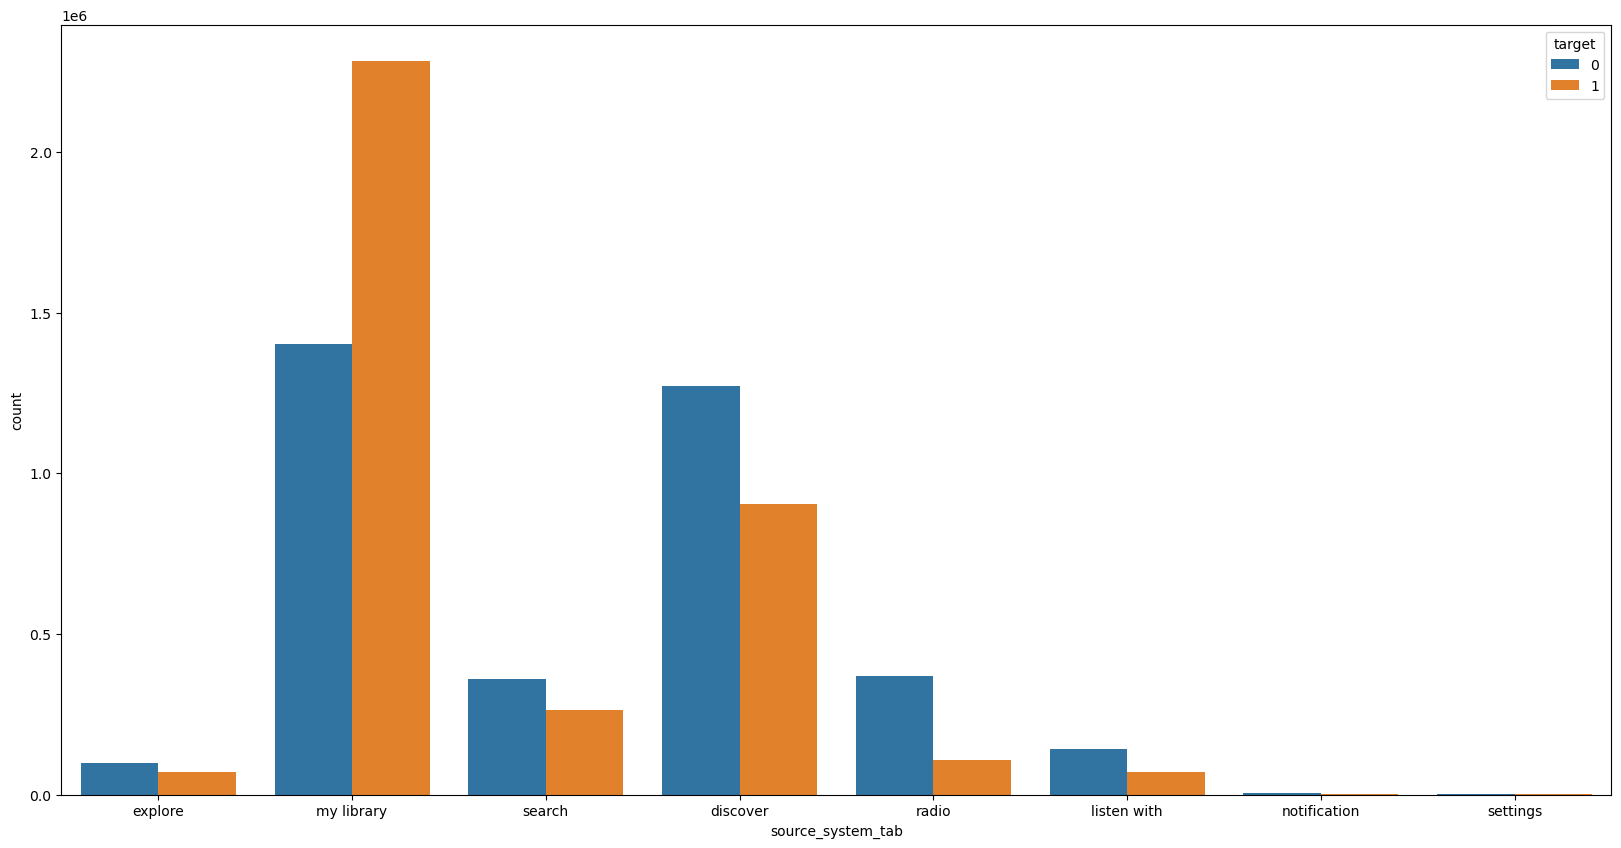

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(x = dfTrain['source_system_tab'],hue=dfTrain['target'])

<Axes: xlabel='source_type', ylabel='count'>

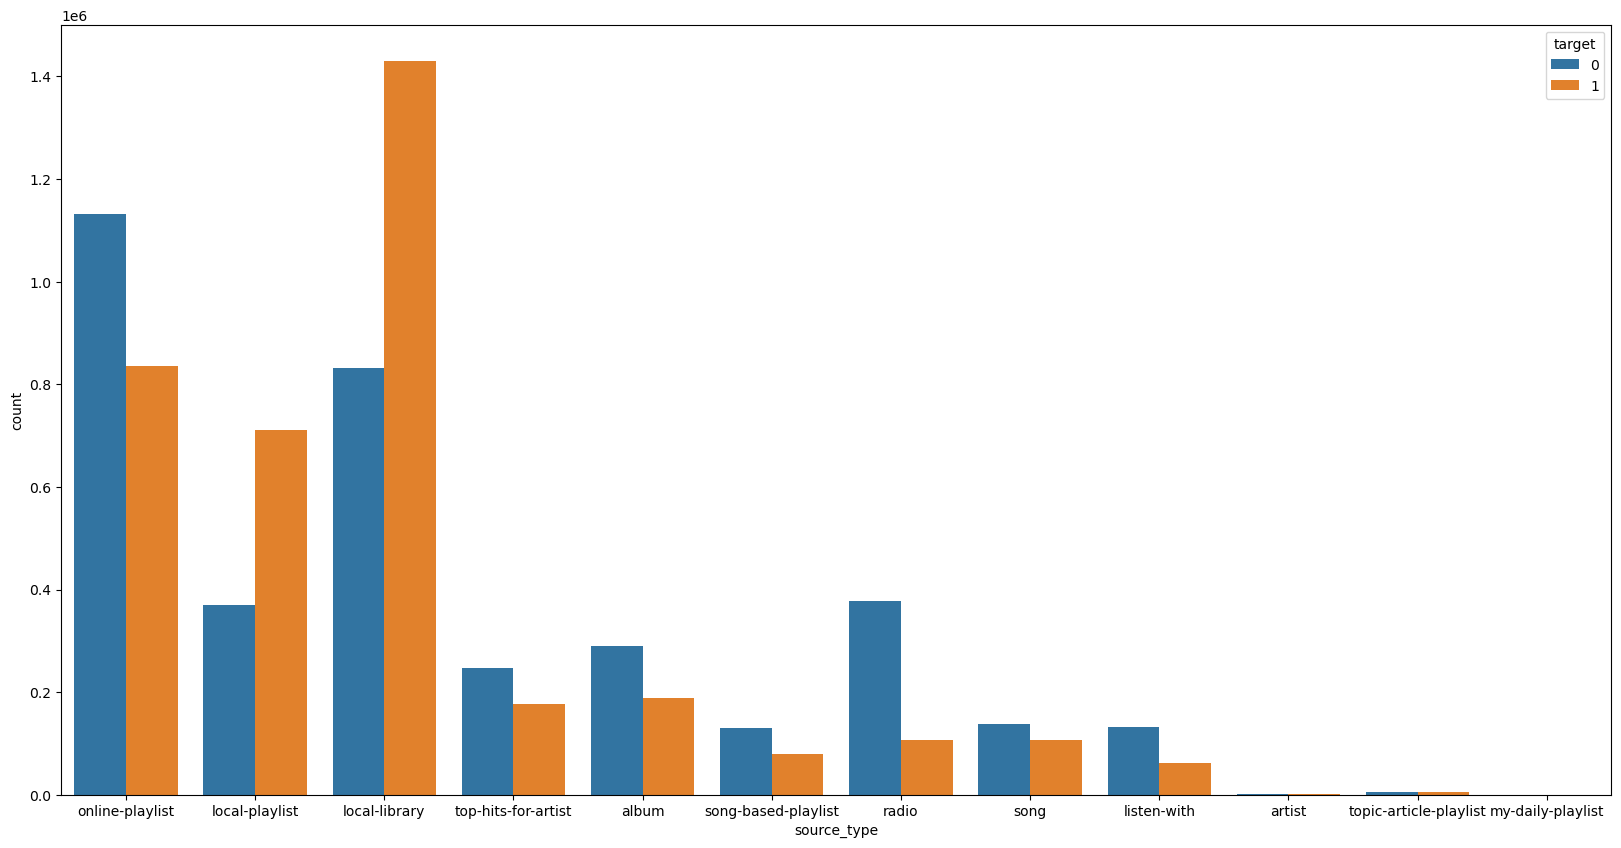

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x = dfTrain['source_type'],hue=dfTrain['target'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'online-playlist'),
  Text(1, 0, 'local-playlist'),
  Text(2, 0, 'local-library'),
  Text(3, 0, 'top-hits-for-artist'),
  Text(4, 0, 'album'),
  Text(5, 0, 'song-based-playlist'),
  Text(6, 0, 'radio'),
  Text(7, 0, 'song'),
  Text(8, 0, 'listen-with'),
  Text(9, 0, 'artist'),
  Text(10, 0, 'topic-article-playlist'),
  Text(11, 0, 'my-daily-playlist')])

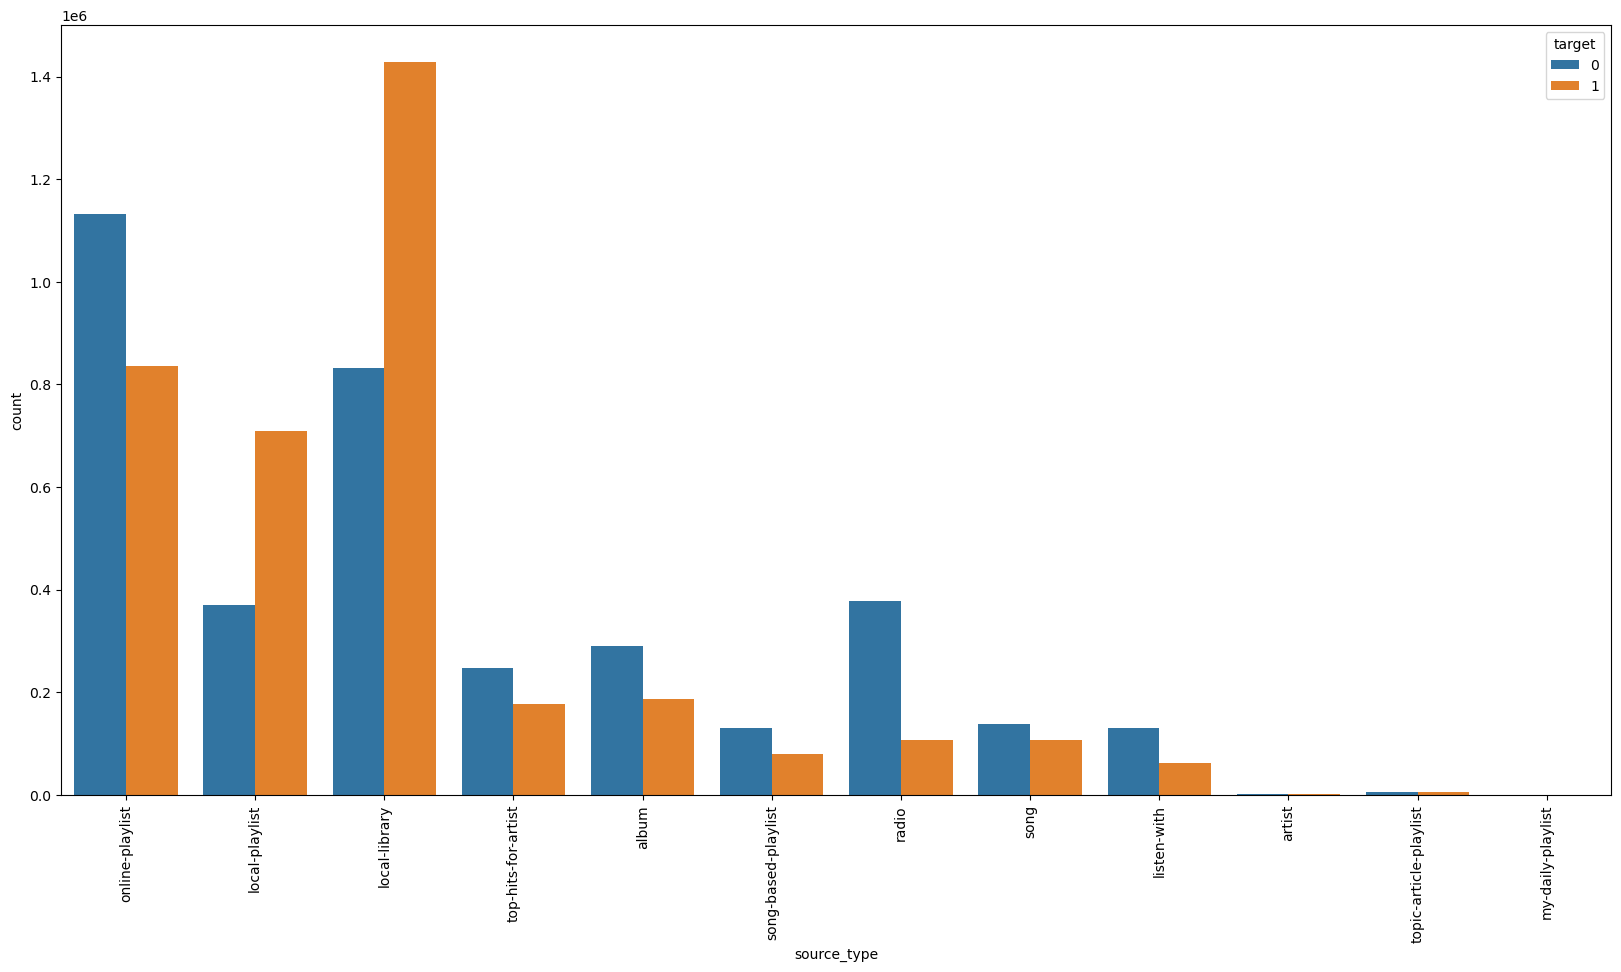

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x = dfTrain['source_type'],hue=dfTrain['target'])
plt.xticks(rotation=90)

In [13]:
dfTrain['target'].value_counts()

1    3714656
0    3662762
Name: target, dtype: int64

In [14]:
dfTrain['source_screen_name'].value_counts()

Local playlist more     3228202
Online playlist more    1294689
Radio                    474467
Album more               420156
Search                   298487
Artist more              252429
Discover Feature         244246
Discover Chart           213658
Others profile more      201795
Discover Genre            82202
My library                75980
Explore                   72342
Unknown                   54170
Discover New              15955
Search Trends             13632
Search Home               13482
My library_Search          6451
Self profile more           212
Concert                      47
Payment                      12
Name: source_screen_name, dtype: int64

In [15]:
dfTrain['source_system_tab'].value_counts()

my library      3684730
discover        2179252
search           623286
radio            476701
listen with      212266
explore          167949
notification       6185
settings           2200
Name: source_system_tab, dtype: int64

In [16]:
dfTest=pd.read_csv('test.csv')
songs=pd.read_csv('songs.csv')
memb=pd.read_csv('members.csv')

In [17]:
dfTest.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [18]:
dfTest.shape

(2556790, 6)

In [19]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id                  int64 
 1   msno                object
 2   song_id             object
 3   source_system_tab   object
 4   source_screen_name  object
 5   source_type         object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


In [20]:
dfTest.nunique()

id                    2556790
msno                    25131
song_id                224753
source_system_tab           8
source_screen_name         22
source_type                12
dtype: int64

In [21]:
dfTest.duplicated().sum()

0

In [22]:
dfTest.isnull().sum()

id                         0
msno                       0
song_id                    0
source_system_tab       8442
source_screen_name    162883
source_type             7297
dtype: int64

In [23]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [24]:
songs.shape

(2296320, 7)

In [25]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [26]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [27]:
songs.duplicated().sum()

0

In [28]:
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

In [29]:
songs.nunique()

song_id        2296320
song_length     146534
genre_ids         1045
artist_name     222363
composer        329823
lyricist        110925
language            10
dtype: int64

<Axes: xlabel='language', ylabel='count'>

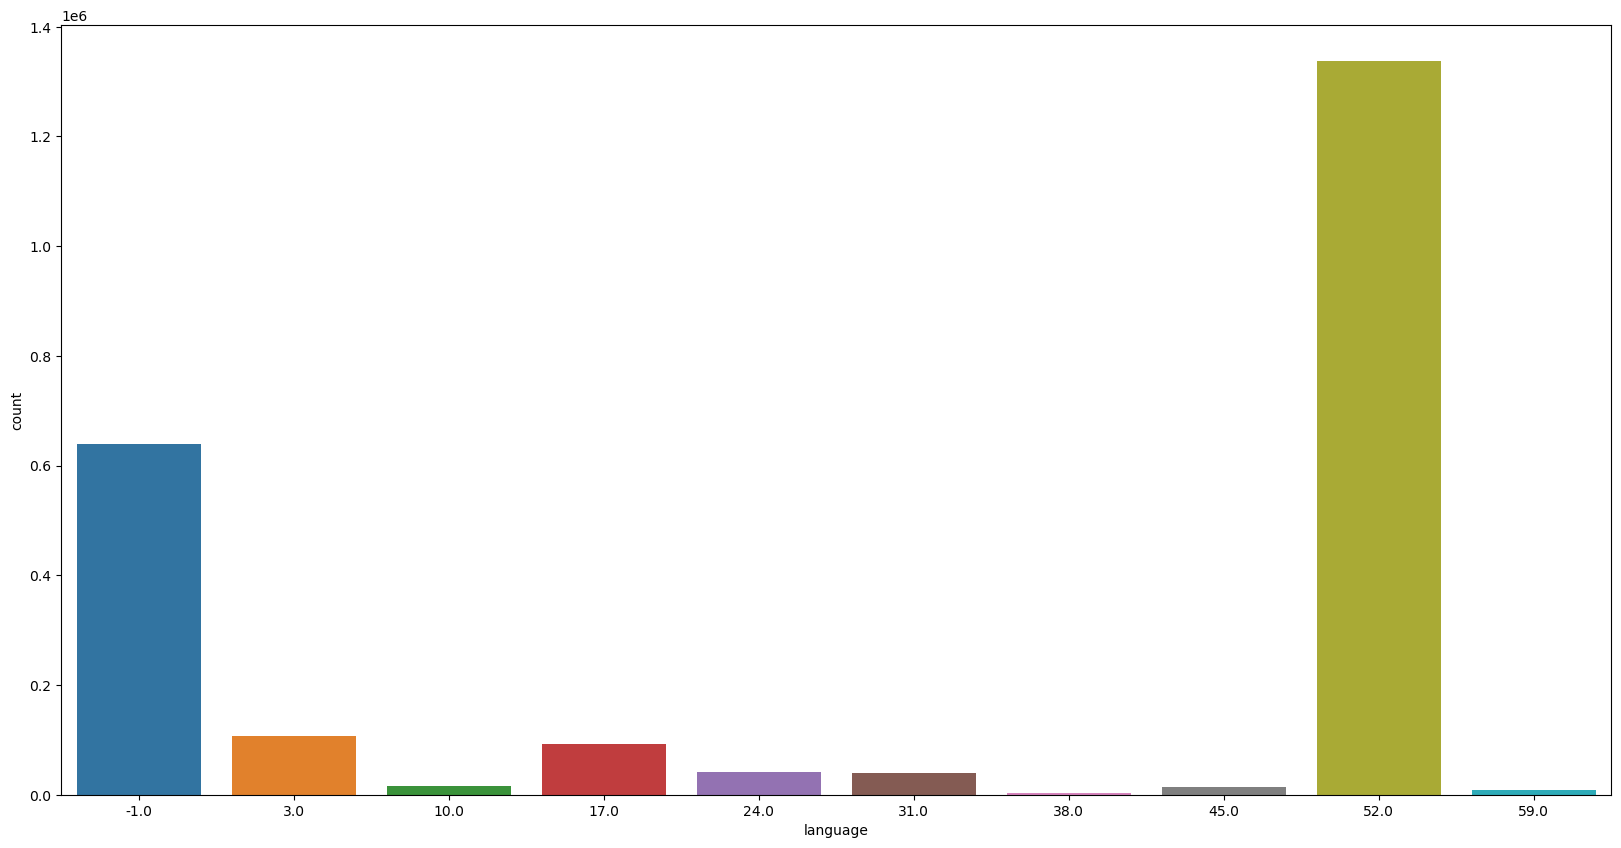

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(x = songs['language'])

In [31]:
songsExtra=pd.read_csv('song_extra_info.csv')

In [32]:
songsExtra.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [33]:
songsExtra.shape

(2295971, 3)

In [34]:
songsExtra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB


In [35]:
songsExtra.isnull().sum()

song_id         0
name            2
isrc       136548
dtype: int64

In [36]:
songsExtra.duplicated().sum()

0

In [37]:
songsExtra.nunique()

song_id    2295971
name       1168979
isrc       1806825
dtype: int64

In [38]:
memb.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [39]:
memb.shape

(34403, 7)

In [40]:
memb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [41]:
memb.duplicated().sum()

0

In [42]:
memb.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [43]:
memb.nunique()

msno                      34403
city                         21
bd                           95
gender                        2
registered_via                6
registration_init_time     3862
expiration_date            1484
dtype: int64

<Axes: xlabel='gender', ylabel='count'>

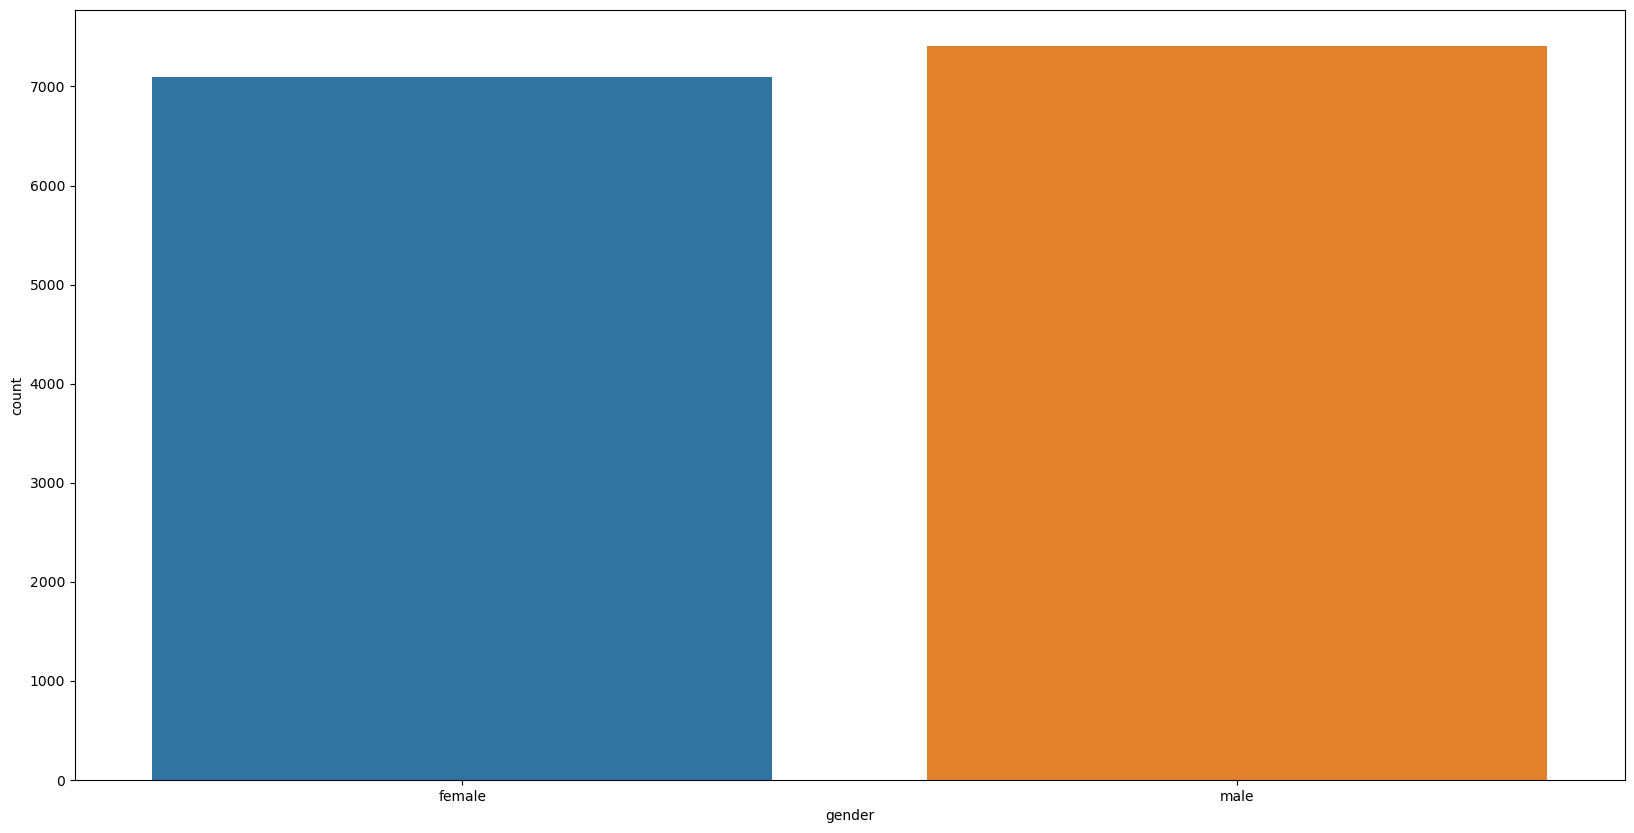

In [44]:
plt.figure(figsize=(20,10))
sns.countplot(x = memb['gender'])

<Axes: xlabel='gender', ylabel='count'>

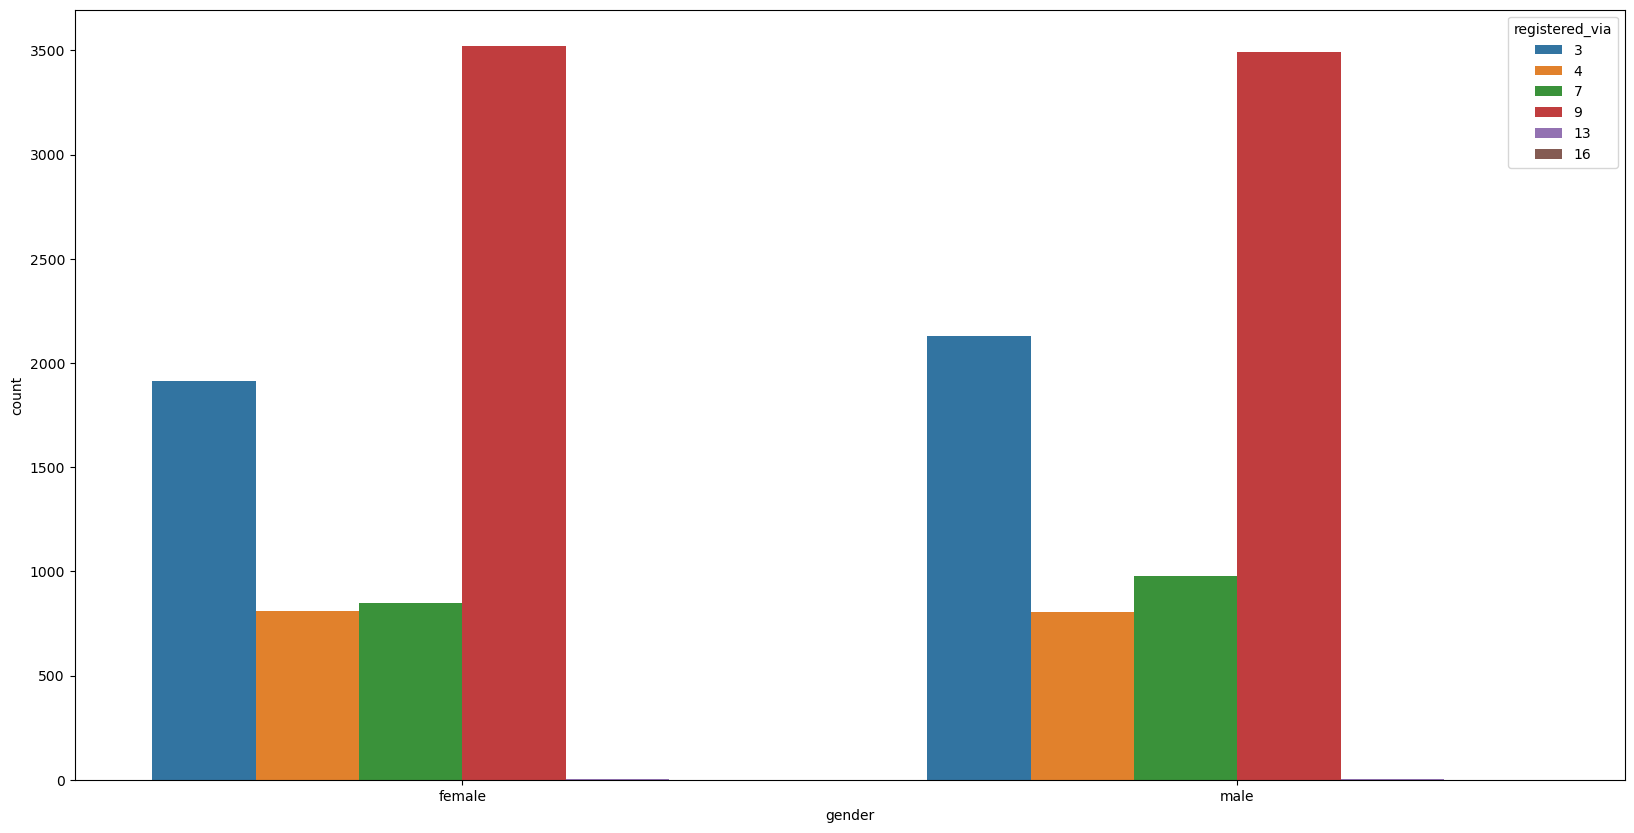

In [45]:
plt.figure(figsize=(20,10))
sns.countplot(x = memb['gender'],hue=memb['registered_via'])

In [46]:
df=dfTrain
dfT=dfTest

Train

In [47]:
df=pd.merge(df, songs, on='song_id', how='left')

In [48]:
df=pd.merge(df, memb, on='msno', how='left')

In [49]:
df=pd.merge(df,songsExtra, on='song_id', how='left')

Test

In [50]:
dfT = pd.merge(dfT, songs, on='song_id', how='left')

In [51]:
dfT=pd.merge(dfT, memb, on='msno', how='left')

In [52]:
dfT=pd.merge(dfT, songsExtra, on='song_id', how='left')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    int64  
 13  bd                      int64  
 14  gender                  object 
 15  registered_via          int64  
 16  registration_init_time  int64  
 17  expiration_date         int64  
 18  name                    object 
 19  isrc                    object 
dtypes: float64(2), int64(6), object(12)
memory usage: 1.2+ GB


In [54]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556790 entries, 0 to 2556789
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      int64  
 1   msno                    object 
 2   song_id                 object 
 3   source_system_tab       object 
 4   source_screen_name      object 
 5   source_type             object 
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    int64  
 13  bd                      int64  
 14  gender                  object 
 15  registered_via          int64  
 16  registration_init_time  int64  
 17  expiration_date         int64  
 18  name                    object 
 19  isrc                    object 
dtypes: float64(2), int64(6), object(12)
memory usage: 409.6+ MB


In [55]:
# Convert date columns to datetime objects
df['registration_init_time'] = pd.to_datetime(df['registration_init_time'], format='%Y-%m-%d')
df['expiration_date'] = pd.to_datetime(df['expiration_date'], format='%Y-%m-%d')

# Extract registration year, month, and day
df['registration_year'] = df['registration_init_time'].dt.year
df['registration_month'] = df['registration_init_time'].dt.month
df['registration_day'] = df['registration_init_time'].dt.day

# Extract expiration year, month, and day
df['expiration_year'] = df['expiration_date'].dt.year
df['expiration_month'] = df['expiration_date'].dt.month
df['expiration_day'] = df['expiration_date'].dt.day

# Drop original date columns
df = df.drop(['registration_init_time', 'expiration_date'], axis=1)


In [56]:
dfT['registration_init_time'] = pd.to_datetime(dfT['registration_init_time'], format='%Y-%m-%d')
dfT['expiration_date'] = pd.to_datetime(dfT['expiration_date'], format='%Y-%m-%d')

dfT['registration_year'] = dfT['registration_init_time'].dt.year
dfT['registration_month'] = dfT['registration_init_time'].dt.month
dfT['registration_day'] = dfT['registration_init_time'].dt.day

dfT['expiration_year'] = dfT['expiration_date'].dt.year
dfT['expiration_month'] = dfT['expiration_date'].dt.month
dfT['expiration_day'] = dfT['expiration_date'].dt.day

dfT = dfT.drop(['registration_init_time', 'expiration_date'], axis=1)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 24 columns):
 #   Column              Dtype  
---  ------              -----  
 0   msno                object 
 1   song_id             object 
 2   source_system_tab   object 
 3   source_screen_name  object 
 4   source_type         object 
 5   target              int64  
 6   song_length         float64
 7   genre_ids           object 
 8   artist_name         object 
 9   composer            object 
 10  lyricist            object 
 11  language            float64
 12  city                int64  
 13  bd                  int64  
 14  gender              object 
 15  registered_via      int64  
 16  name                object 
 17  isrc                object 
 18  registration_year   int64  
 19  registration_month  int64  
 20  registration_day    int64  
 21  expiration_year     int64  
 22  expiration_month    int64  
 23  expiration_day      int64  
dtypes: float64(2), int64(10)

In [59]:
def isrc_to_year(isrc):
    if type(isrc)==str:
        if int(isrc[5:7])>17:
            return 1900+int(isrc[5:7])
        else:
            return 2000+int(isrc[5:7])
    else:
        return np.nan
    
df['song_year']=df['isrc'].apply(isrc_to_year)
dfT['song_year']=df['isrc'].apply(isrc_to_year)

<Axes: >

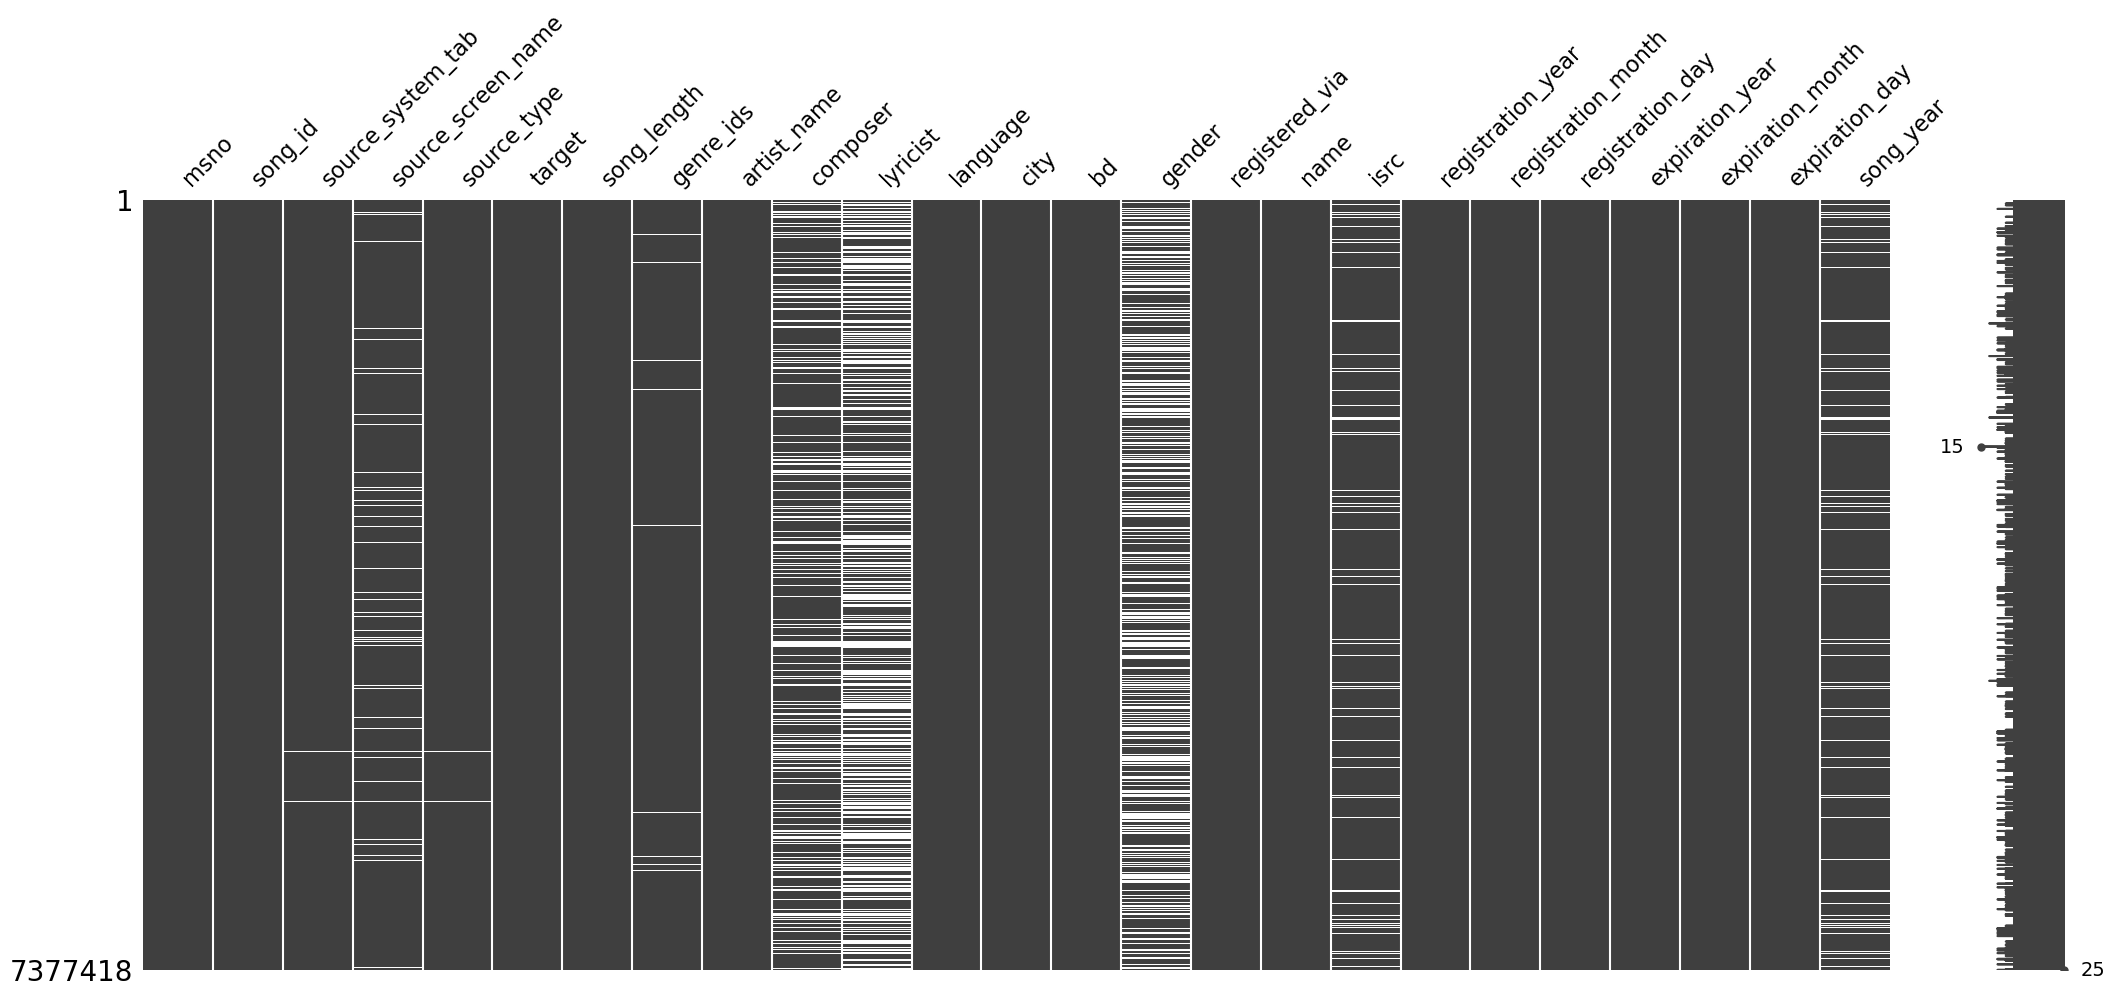

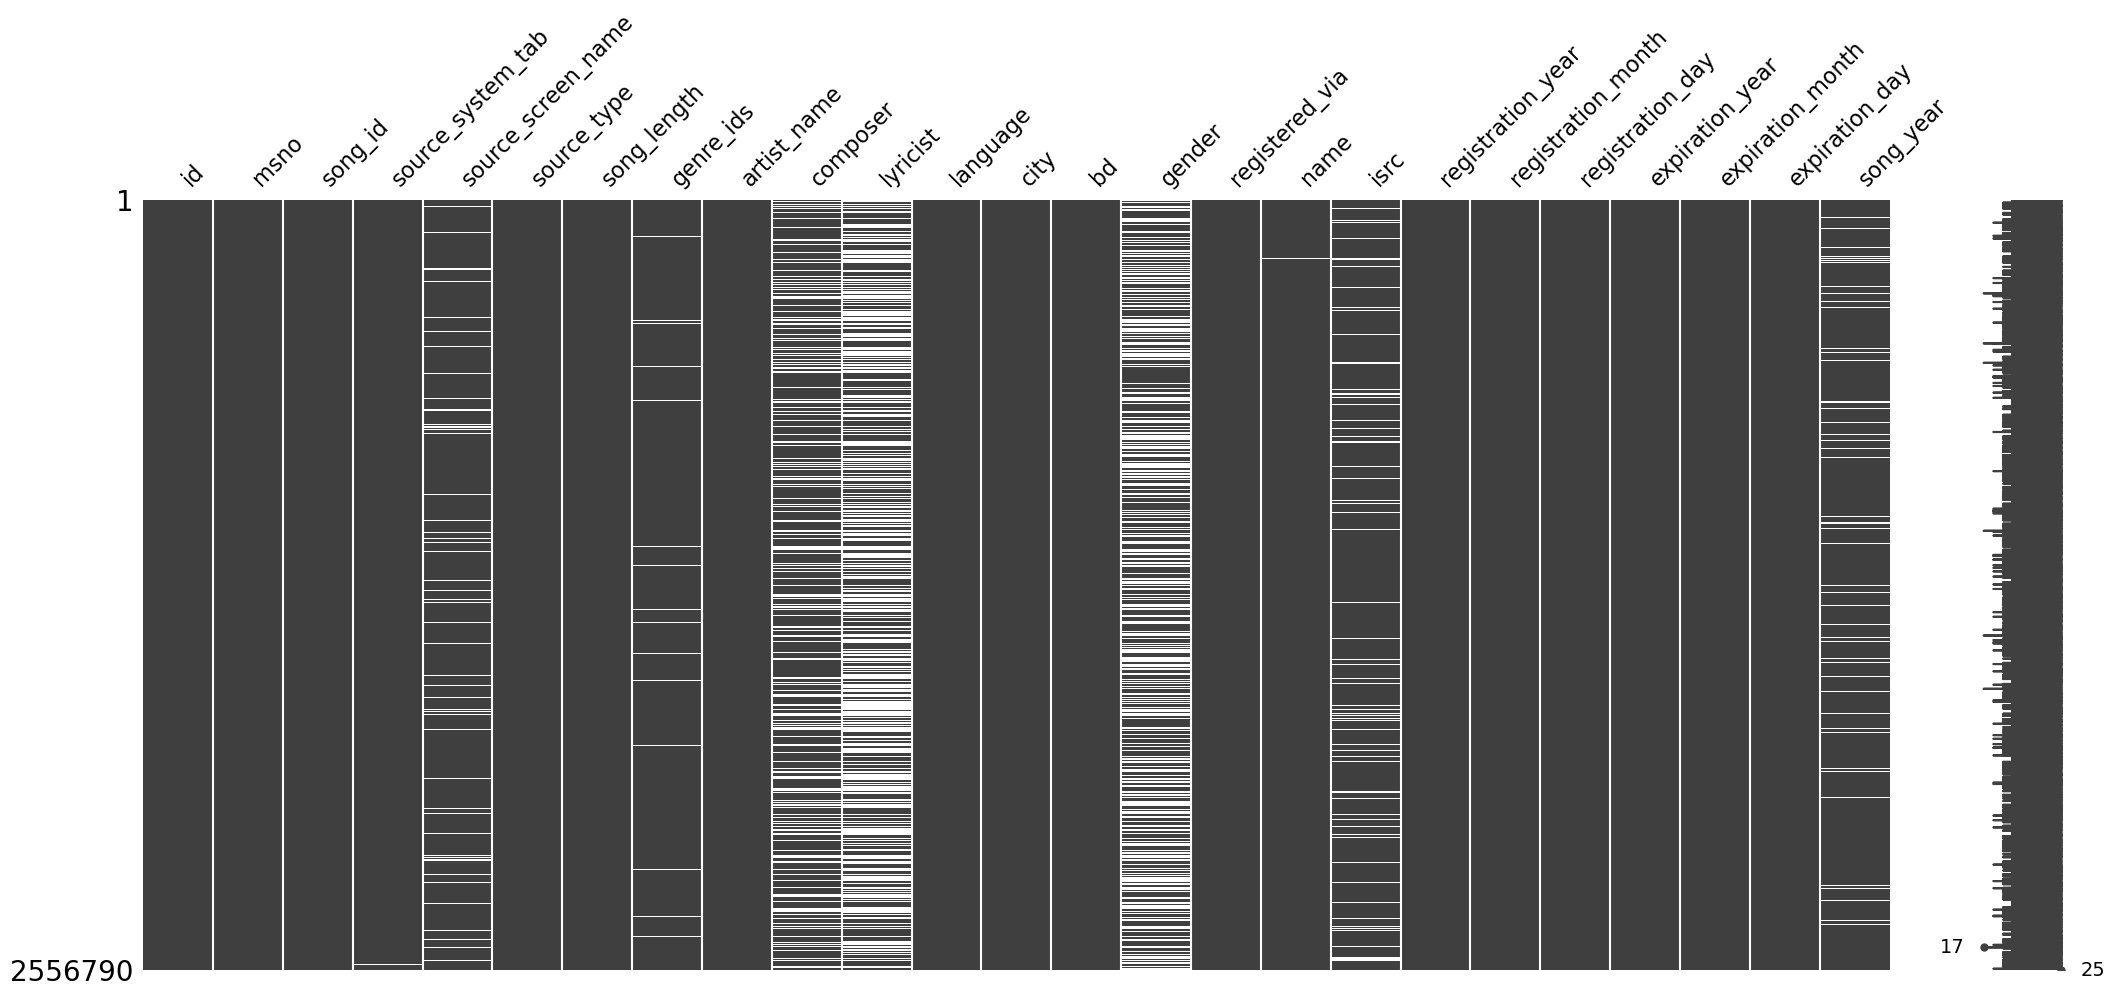

In [61]:
msno.matrix(df)
msno.matrix(dfT)

In [62]:
ch1 = pd.DataFrame(df.dtypes, columns=["Data Type"])
ch1["Unique Values"] = df.nunique().sort_values()
ch1["Null Values"] = df.isnull().sum()
ch1["% null Values"] = df.isnull().sum()/len(df)
ch1 = ch1.sort_values(by="Null Values", ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)
ch1

,Data Type,Unique Values,Null Values,% null Values
lyricist,object,33888,3178798,0.430882
gender,object,2,2961479,0.401425
composer,object,76064,1675706,0.227140
song_year,float64,100,577858,0.078328
isrc,object,269760,577858,0.078328
source_screen_name,object,20,414804,0.056226
genre_ids,object,572,118455,0.016056
source_system_tab,object,8,24849,0.003368
source_type,object,12,21539,0.002920
name,object,234144,1457,0.000197


In [63]:
df['song_length'].fillna(df['song_length'].mean() , inplace = True)
df['song_length'] = df['song_length'].astype(np.uint32)
df['language'].fillna(df['language'].mode().values[0] , inplace= True)
df['language'] = df['language'].astype(np.int8)
df['song_year'].fillna(1917, inplace = True)
df['song_year'] = df['song_year'].astype(np.int8)

In [64]:
dfT['song_length'].fillna(dfT['song_length'].mean(), inplace=True)
dfT['song_length'] = dfT['song_length'].astype(np.uint32)

dfT['language'].fillna(dfT['language'].mode().values[0], inplace=True)
dfT['language'] = dfT['language'].astype(np.int8)

dfT['song_year'].fillna(1917, inplace=True)
dfT['song_year'] = dfT['song_year'].astype(np.int8)

In [65]:
# For string columns with missing values, fill with 'Unknown'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(value="Unknown")

# For numeric columns with missing values, fill with mean
for col in df.select_dtypes(exclude=['object']).columns:
    df[col] = df[col].fillna(value=df[col].mean())

In [66]:
# For string columns with missing values, fill with 'Unknown'
for col in dfT.select_dtypes(include=['object']).columns:
    dfT[col] = dfT[col].fillna(value="Unknown")

# For numeric columns with missing values, fill with mean
for col in dfT.select_dtypes(exclude=['object']).columns:
    dfT[col] = dfT[col].fillna(value=dfT[col].mean())


In [68]:
df['bd'] = df['bd'].apply(lambda x : 0 if x > 100 else abs(x))
dfT['bd'] = dfT['bd'].apply(lambda x : 0 if x > 100 else abs(x))

In [69]:
drop = ['isrc', 'name']
df.drop(columns = drop , inplace = True)
dfT.drop(columns=drop , inplace = True)


In [72]:
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])
    
for i in dfT.columns:
    dfT[i] = le.fit_transform(dfT[i])

In [73]:
y = df[['target']]
X = df.drop('target', axis=1)

In [75]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [79]:
train_ds = lgb.Dataset(X_train, label = y_train)
val_ds = lgb.Dataset(X_valid, label = y_valid)

dfT = dfT.drop('id',axis=1)

In [84]:
params = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 216,
    'feature_fraction': 0.9,
    'feature_fraction_seed': 1,
    'bagging_fraction': 0.95,
    'bagging_freq': 1,
    'bagging_seed': 1,
    'learning_rate': 0.3, 
    'max_bin': 510,
    'max_depth': 20,
    'num_rounds': 500,
}

lgb_model = lgb.train(params, train_ds, valid_sets=val_ds)
lgb_pred = lgb_model.predict(X_valid)


C:\Users\nikhi\anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 2971310, number of negative: 2930624
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3517
[LightGBM] [Info] Number of data points in the train set: 5901934, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503447 -> initscore=0.013788
[LightGBM] [Info] Start training from score 0.013788


In [86]:
y_pred = lgb_model.predict(dfT)

In [90]:
y_valid_predictions = (lgb_pred > 0.5).astype(int) 

accuracy = accuracy_score(y_valid, y_valid_predictions)*100
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 70.40
